In [76]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [77]:
file_path = "data/train_u6lujuX_CVtuZ9i.csv"

In [78]:
df = pd.read_csv(file_path)

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [80]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [81]:
# check for null values
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [82]:
df_cleanednull = df.dropna()

df_cleanednull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [83]:
df_cleanednull = df_cleanednull.drop(['Loan_ID'], axis=1)

df_cleanednull.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


Loan_Status
Y    422
N    192
Name: count, dtype: int64


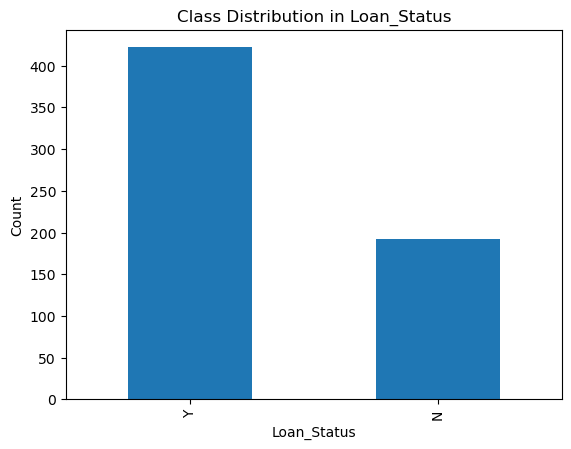

In [84]:
# Check the distribution of the target variable
print(df['Loan_Status'].value_counts())

# Optionally, visualize the class distribution using a bar plot
import matplotlib.pyplot as plt

df['Loan_Status'].value_counts().plot(kind='bar')
plt.title('Class Distribution in Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

Loan_Status
Y    332
N    148
Name: count, dtype: int64


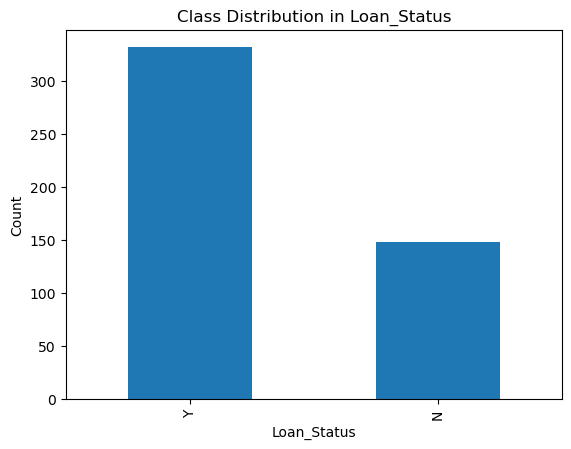

In [85]:
# Check the distribution of the target variable
print(df_cleanednull['Loan_Status'].value_counts())

# Optionally, visualize the class distribution using a bar plot
import matplotlib.pyplot as plt

df_cleanednull['Loan_Status'].value_counts().plot(kind='bar')
plt.title('Class Distribution in Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

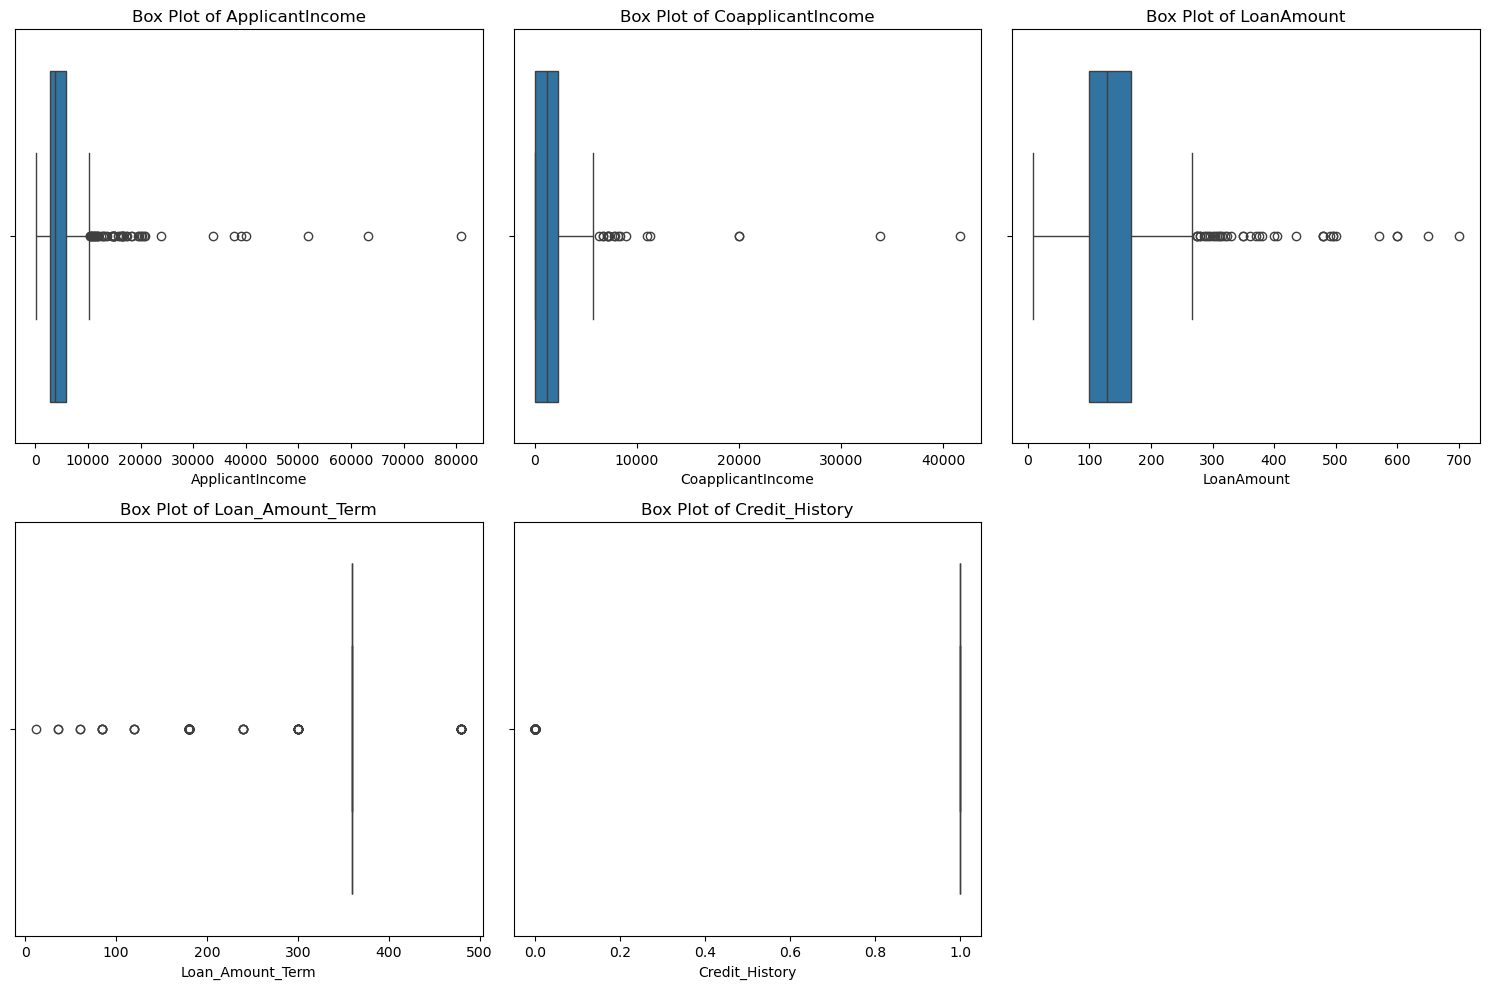

In [86]:
# Check outliers

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

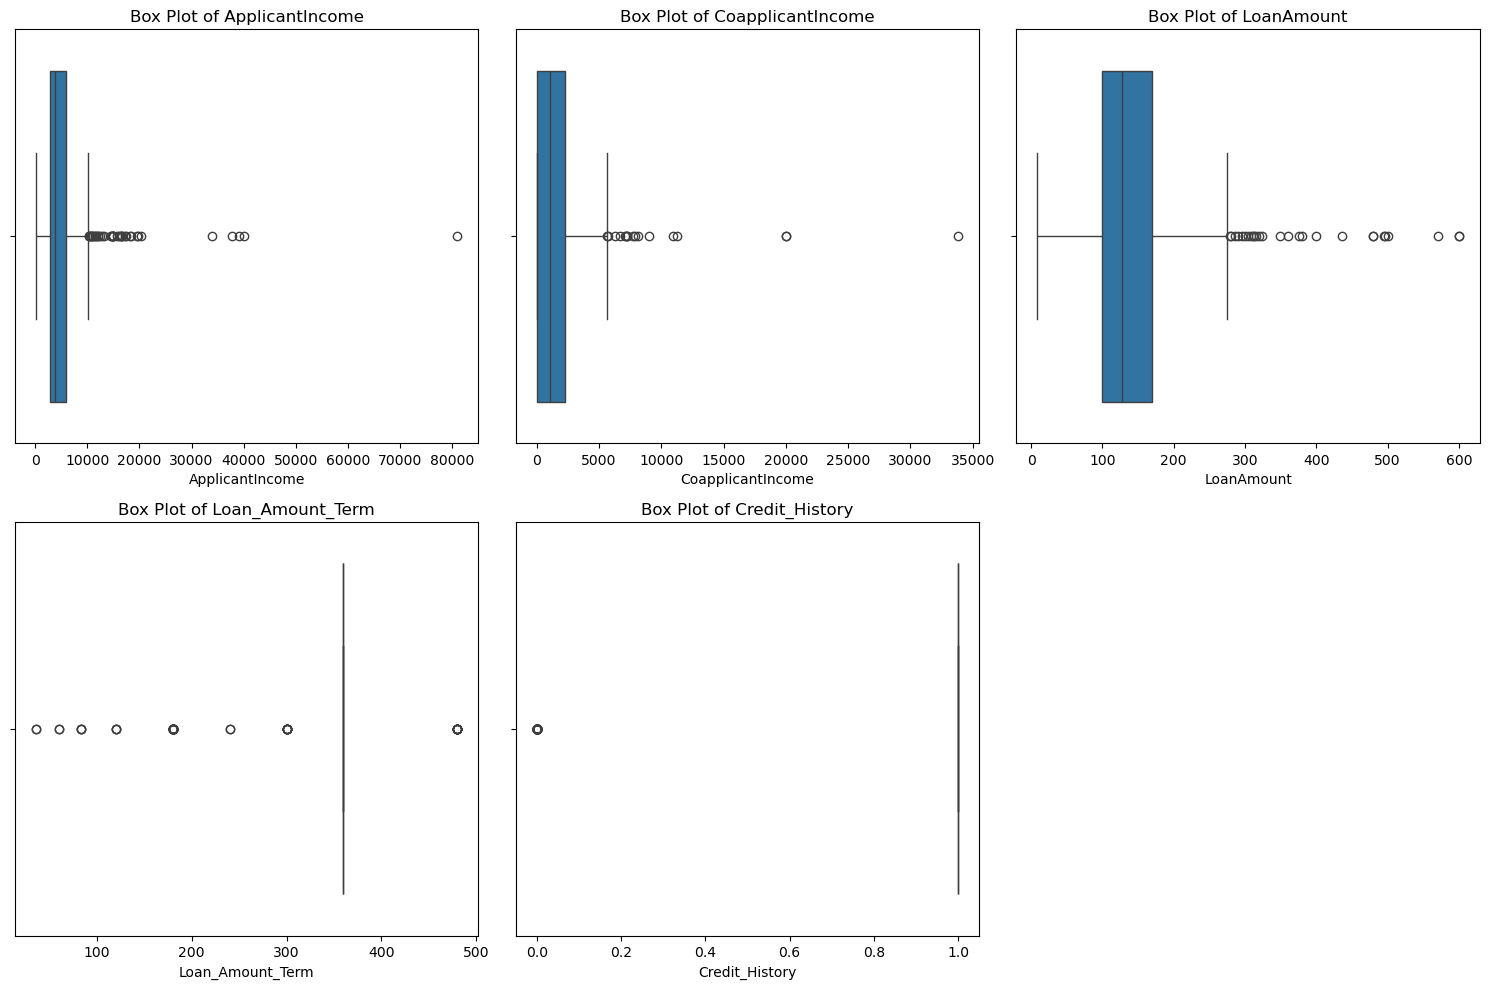

In [87]:
numerical_features = df_cleanednull.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_cleanednull[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [88]:
df_cleanednull.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Gender
Male      394
Female     86
Name: count, dtype: int64


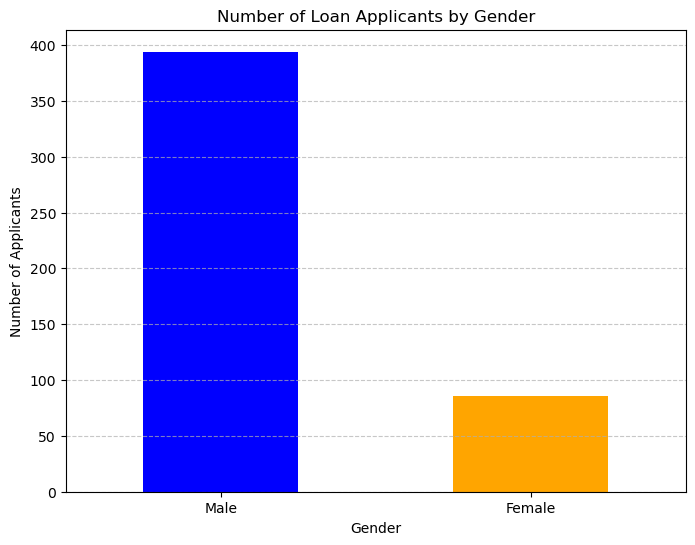

In [89]:
print(df_cleanednull['Gender'].value_counts())

# Group by Gender and count the number of applicants
applicant_count_by_gender = df_cleanednull['Gender'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
applicant_count_by_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Loan Applicants by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From above we can see that most gender that applies for loans are men

Married
Yes    311
No     169
Name: count, dtype: int64


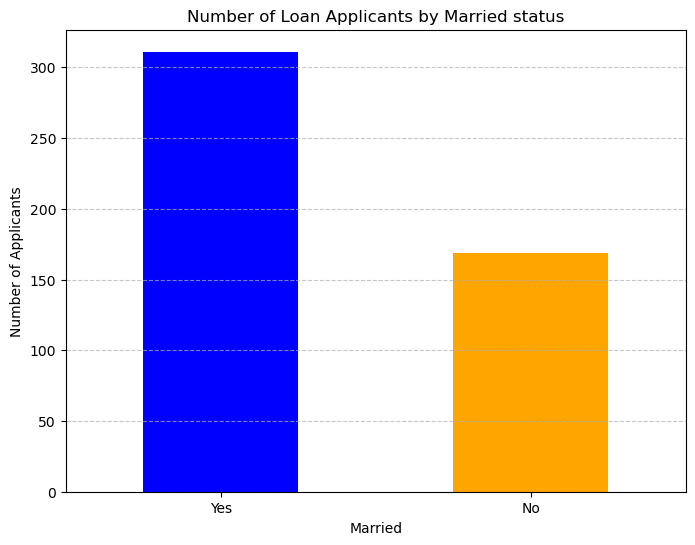

In [90]:
print(df_cleanednull['Married'].value_counts())

# Group by Gender and count the number of applicants
applicant_count_by_gender = df_cleanednull['Married'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
applicant_count_by_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Loan Applicants by Married status')
plt.xlabel('Married')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Those who are married are the ones who apply for loans most than those who are not.

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64


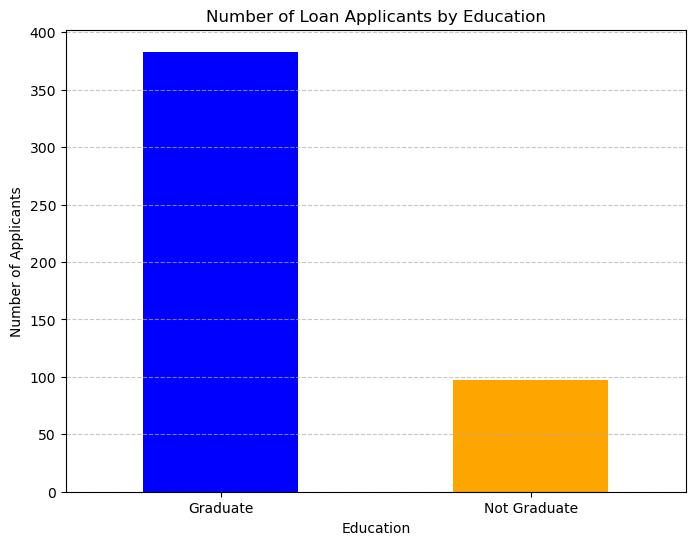

In [91]:
print(df_cleanednull['Education'].value_counts())

# Group by Gender and count the number of applicants
applicant_count_by_gender = df_cleanednull['Education'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
applicant_count_by_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Loan Applicants by Education')
plt.xlabel('Education')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most applicants are Graduates compared to non Graduates

Self_Employed
No     414
Yes     66
Name: count, dtype: int64


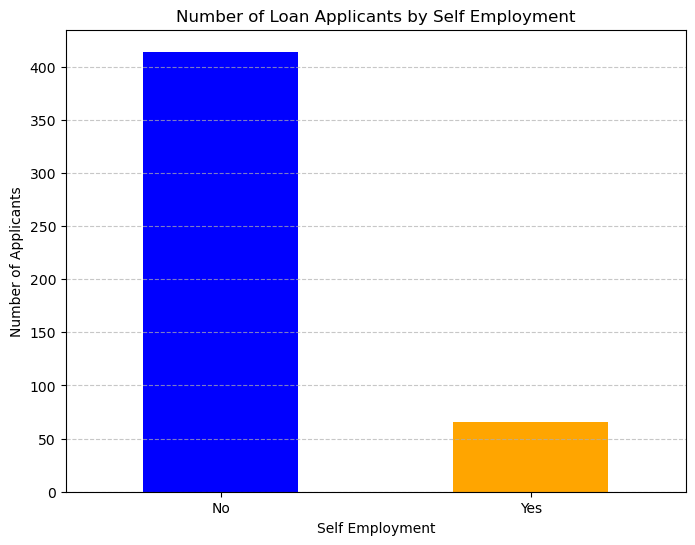

In [92]:
print(df_cleanednull['Self_Employed'].value_counts())

# Group by Gender and count the number of applicants
applicant_count_by_gender = df_cleanednull['Self_Employed'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
applicant_count_by_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Loan Applicants by Self Employment')
plt.xlabel('Self Employment')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most applicants are not self employed compared to those self employed

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64


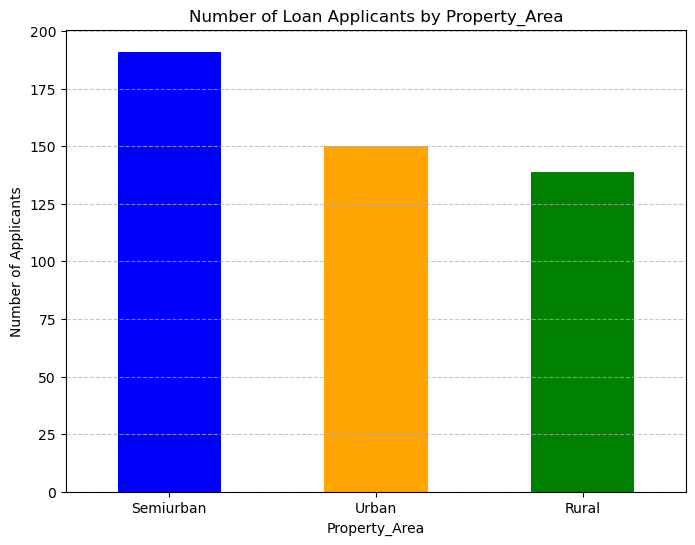

In [93]:
print(df_cleanednull['Property_Area'].value_counts())


# Group by Gender and count the number of applicants
applicant_count_by_gender = df_cleanednull['Property_Area'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
applicant_count_by_gender.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Number of Loan Applicants by Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Number of applicants by property area the Semiurban are the most followed by urban and rural respectfully.

In [94]:
# Select only int64 and float64 columns
numeric_columns = df_cleanednull.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_cleanednull[numeric_columns]

# Print the selected columns to verify
print("Columns included in correlation analysis:", df_numeric.columns.tolist())

Columns included in correlation analysis: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [95]:
# Compute the correlation matrix
correlation_matrix = df_numeric.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


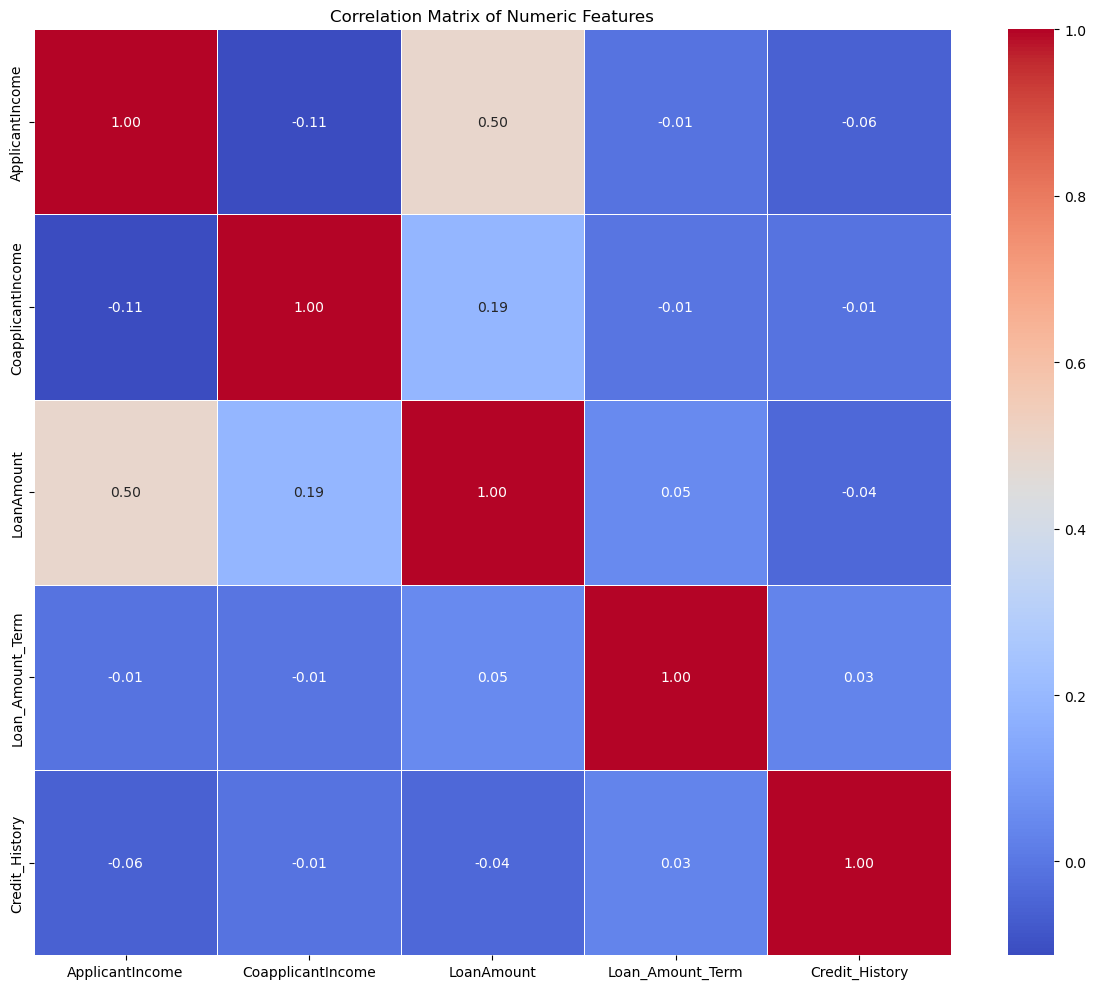

In [96]:
# Plot the heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()  
plt.show()

If an applicant's income is high, they are more likely to receive a larger loan, though the relationship isn’t perfect.

In [97]:
# feature engineering

df_cleanednull.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [98]:
# Make new feature total income

df_cleanednull['Total_Income'] = df_cleanednull['ApplicantIncome'] + df_cleanednull['CoapplicantIncome']

df_cleanednull.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


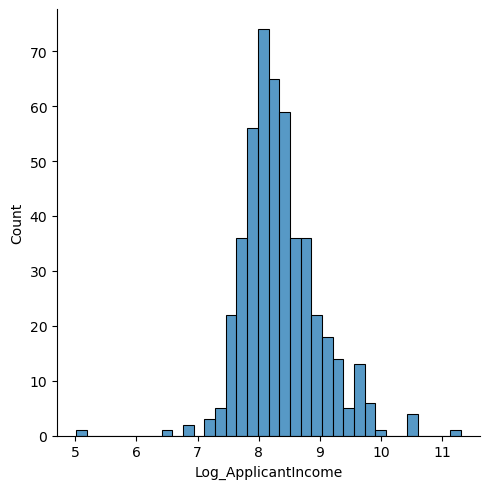

In [99]:
# log transformation normalization to handle skewed data making the distribution more symmetric and closer to a normal distribution.
import numpy as np

df_cleanednull['Log_ApplicantIncome'] = np.log1p(df_cleanednull['ApplicantIncome'])


sns.displot(df_cleanednull['Log_ApplicantIncome'])

reduce the impact of extreme income outliers on the logistic regression model.The log1p function is used to handle zero values if there. 

In [100]:
df_cleanednull.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_ApplicantIncome
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,8.597482


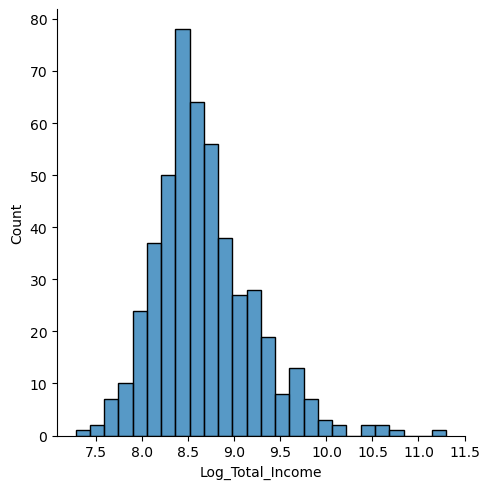

In [101]:
df_cleanednull['Log_Total_Income'] = np.log1p(df_cleanednull['Total_Income'])


sns.displot(df_cleanednull['Log_Total_Income'])

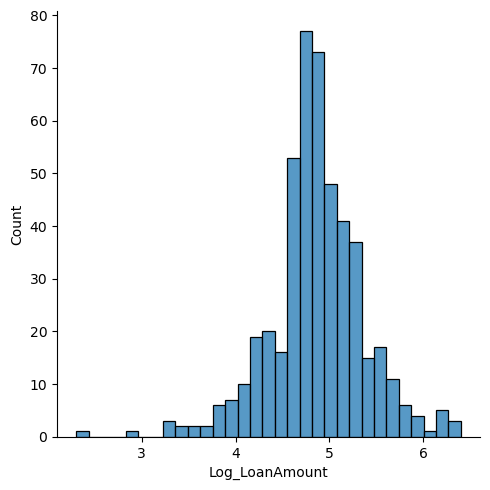

In [102]:
df_cleanednull['Log_LoanAmount'] = np.log1p(df_cleanednull['LoanAmount'])


sns.displot(df_cleanednull['Log_LoanAmount'])

In [103]:
df_cleanednull.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_ApplicantIncome,Log_Total_Income,Log_LoanAmount
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,8.714732,4.859812
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,8.006701,4.204693
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,8.505525,4.795791
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,8.699681,4.955827
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,8.597482,9.170976,5.590987


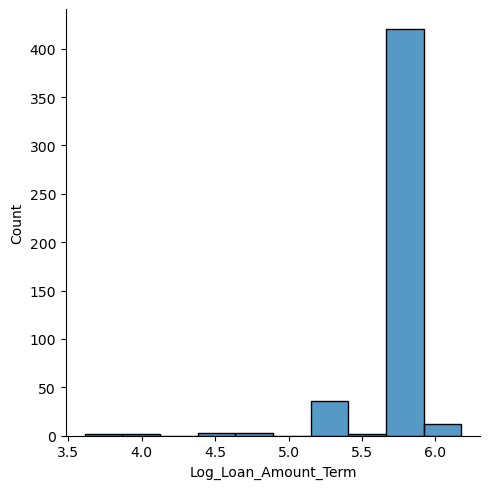

In [104]:
df_cleanednull['Log_Loan_Amount_Term'] = np.log1p(df_cleanednull['Loan_Amount_Term'])


sns.displot(df_cleanednull['Log_Loan_Amount_Term'])

In [105]:
df_cleanednull.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_ApplicantIncome,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,8.714732,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,8.006701,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,8.505525,4.795791,5.888878
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,8.699681,4.955827,5.888878
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,8.597482,9.170976,5.590987,5.888878


In [106]:
# Dropping coloumns 

df_cleanednull = df_cleanednull.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income'], axis=1)



dropping the original features,  ensures that the model doesn't get confused by redundant or less informative data, thus improving its predictive performance.

In [107]:
df_cleanednull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                480 non-null    object 
 1   Married               480 non-null    object 
 2   Dependents            480 non-null    object 
 3   Education             480 non-null    object 
 4   Self_Employed         480 non-null    object 
 5   Credit_History        480 non-null    float64
 6   Property_Area         480 non-null    object 
 7   Loan_Status           480 non-null    object 
 8   Log_ApplicantIncome   480 non-null    float64
 9   Log_Total_Income      480 non-null    float64
 10  Log_LoanAmount        480 non-null    float64
 11  Log_Loan_Amount_Term  480 non-null    float64
dtypes: float64(5), object(7)
memory usage: 48.8+ KB


In [108]:
# one hot encoding
df_encoded = pd.get_dummies(df_cleanednull, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])
df_encoded.head()


,Dependents,Credit_History,Loan_Status,Log_ApplicantIncome,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1.0,N,8.430327,8.714732,4.859812,5.888878,False,True,False,True,True,False,True,False,True,False,False
2,0,1.0,Y,8.006701,8.006701,4.204693,5.888878,False,True,False,True,True,False,False,True,False,False,True
3,0,1.0,Y,7.857094,8.505525,4.795791,5.888878,False,True,False,True,False,True,True,False,False,False,True
4,0,1.0,Y,8.699681,8.699681,4.955827,5.888878,False,True,True,False,True,False,True,False,False,False,True
5,2,1.0,Y,8.597482,9.170976,5.590987,5.888878,False,True,False,True,True,False,False,True,False,False,True


In [109]:
# Label encoding

from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df_encoded['Loan_Status'] = label_encoder.fit_transform(df_encoded['Loan_Status'])

df_encoded.head()

,Dependents,Credit_History,Loan_Status,Log_ApplicantIncome,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1.0,0,8.430327,8.714732,4.859812,5.888878,False,True,False,True,True,False,True,False,True,False,False
2,0,1.0,1,8.006701,8.006701,4.204693,5.888878,False,True,False,True,True,False,False,True,False,False,True
3,0,1.0,1,7.857094,8.505525,4.795791,5.888878,False,True,False,True,False,True,True,False,False,False,True
4,0,1.0,1,8.699681,8.699681,4.955827,5.888878,False,True,True,False,True,False,True,False,False,False,True
5,2,1.0,1,8.597482,9.170976,5.590987,5.888878,False,True,False,True,True,False,False,True,False,False,True


In [110]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               480 non-null    object 
 1   Credit_History           480 non-null    float64
 2   Loan_Status              480 non-null    int32  
 3   Log_ApplicantIncome      480 non-null    float64
 4   Log_Total_Income         480 non-null    float64
 5   Log_LoanAmount           480 non-null    float64
 6   Log_Loan_Amount_Term     480 non-null    float64
 7   Gender_Female            480 non-null    bool   
 8   Gender_Male              480 non-null    bool   
 9   Married_No               480 non-null    bool   
 10  Married_Yes              480 non-null    bool   
 11  Education_Graduate       480 non-null    bool   
 12  Education_Not Graduate   480 non-null    bool   
 13  Self_Employed_No         480 non-null    bool   
 14  Self_Employed_Yes        480 no

In [111]:
df_encoded.head()

,Dependents,Credit_History,Loan_Status,Log_ApplicantIncome,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1.0,0,8.430327,8.714732,4.859812,5.888878,False,True,False,True,True,False,True,False,True,False,False
2,0,1.0,1,8.006701,8.006701,4.204693,5.888878,False,True,False,True,True,False,False,True,False,False,True
3,0,1.0,1,7.857094,8.505525,4.795791,5.888878,False,True,False,True,False,True,True,False,False,False,True
4,0,1.0,1,8.699681,8.699681,4.955827,5.888878,False,True,True,False,True,False,True,False,False,False,True
5,2,1.0,1,8.597482,9.170976,5.590987,5.888878,False,True,False,True,True,False,False,True,False,False,True


In [112]:
df_encoded['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [113]:
df_encoded['Dependents'].dtype

dtype('O')

In [116]:
# Fill missing values with a default value, e.g., 0
df_encoded['Dependents'].fillna(0, inplace=True)

# Replace '3+' with 3
df_encoded['Dependents'] = df_encoded['Dependents'].replace('3+', 3)

# Convert the column to int64
df_encoded['Dependents'] = df_encoded['Dependents'].astype('int64')


In [117]:
df_encoded.head()



,Dependents,Credit_History,Loan_Status,Log_ApplicantIncome,Log_Total_Income,Log_LoanAmount,Log_Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1.0,0,8.430327,8.714732,4.859812,5.888878,False,True,False,True,True,False,True,False,True,False,False
2,0,1.0,1,8.006701,8.006701,4.204693,5.888878,False,True,False,True,True,False,False,True,False,False,True
3,0,1.0,1,7.857094,8.505525,4.795791,5.888878,False,True,False,True,False,True,True,False,False,False,True
4,0,1.0,1,8.699681,8.699681,4.955827,5.888878,False,True,True,False,True,False,True,False,False,False,True
5,2,1.0,1,8.597482,9.170976,5.590987,5.888878,False,True,False,True,True,False,False,True,False,False,True


In [118]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               480 non-null    int64  
 1   Credit_History           480 non-null    float64
 2   Loan_Status              480 non-null    int32  
 3   Log_ApplicantIncome      480 non-null    float64
 4   Log_Total_Income         480 non-null    float64
 5   Log_LoanAmount           480 non-null    float64
 6   Log_Loan_Amount_Term     480 non-null    float64
 7   Gender_Female            480 non-null    bool   
 8   Gender_Male              480 non-null    bool   
 9   Married_No               480 non-null    bool   
 10  Married_Yes              480 non-null    bool   
 11  Education_Graduate       480 non-null    bool   
 12  Education_Not Graduate   480 non-null    bool   
 13  Self_Employed_No         480 non-null    bool   
 14  Self_Employed_Yes        480 no

In [119]:
# Dependent and independent features


# Independent features (all columns except 'Loan_Status')
X = df_encoded.drop(columns=['Loan_Status'])

# Dependent feature (target variable)
y = df_encoded['Loan_Status']

# Display the shapes of X and y to confirm
print("Independent features (X) shape:", X.shape)
print("Dependent feature (y) shape:", y.shape)

Independent features (X) shape: (480, 17)
Dependent feature (y) shape: (480,)


#### Logistic regression model

In [120]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier





In [121]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (384, 17)
Testing features shape: (96, 17)
Training target shape: (384,)
Testing target shape: (96,)
